In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
np.random.seed(42)
data = np.random.rand(20, 2) * 100  # 20 random delivery points scaled to 0-100
delivery_points = pd.DataFrame(data, columns=['Latitude', 'Longitude'])

In [4]:
num_clusters = 3  # Number of trucks/routes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
delivery_points['Cluster'] = kmeans.fit_predict(delivery_points[['Latitude', 'Longitude']])

In [5]:
centroids = kmeans.cluster_centers_

In [6]:
def calculate_route_distance(points):
    # Basic nearest neighbor approach for route within a cluster
    route = [0]  # Start at first point
    unvisited = list(range(1, len(points)))
    current = 0
    while unvisited:
        distances = cdist([points[current]], points[unvisited])[0]
        next_point = unvisited[np.argmin(distances)]
        route.append(next_point)
        current = next_point
        unvisited.remove(current)
    return route

In [7]:
total_distance = 0
for cluster in range(num_clusters):
    cluster_points = delivery_points[delivery_points['Cluster'] == cluster][['Latitude', 'Longitude']].values
    if len(cluster_points) > 1:
        route = calculate_route_distance(cluster_points)
        cluster_distance = sum(cdist(cluster_points[route[:-1]], cluster_points[route[1:]]))[0]
        total_distance += cluster_distance
        print(f"Cluster {cluster} Route: {route}, Distance: {cluster_distance:.2f}")
    else:
        print(f"Cluster {cluster} has only one point, no route needed.")

Cluster 0 Route: [0, 1, 7, 2, 4, 6, 3, 5], Distance: 153.16
Cluster 1 Route: [0, 4, 3, 5, 1, 6, 2], Distance: 168.91
Cluster 2 Route: [0, 4, 2, 1, 3], Distance: 71.78


In [8]:
print(f"Total Distance (Cost Proxy): {total_distance:.2f}")

Total Distance (Cost Proxy): 393.85


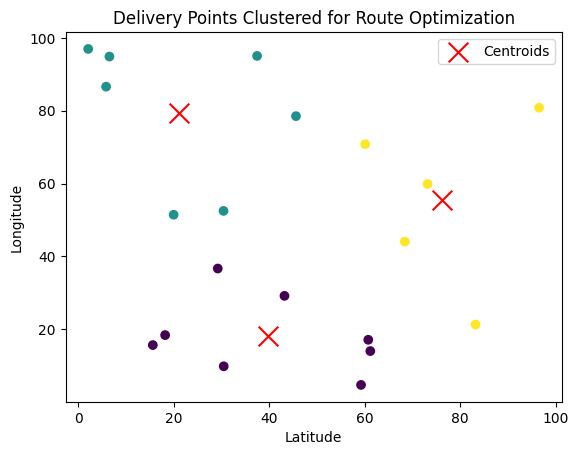

In [9]:
plt.scatter(delivery_points['Latitude'], delivery_points['Longitude'], c=delivery_points['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("Delivery Points Clustered for Route Optimization")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [10]:
original_distance = cdist(data, data).sum() / 2  # Naive total distance without optimization
reduction_percent = (original_distance - total_distance) / original_distance * 100
print(f"Estimated Cost Reduction: {reduction_percent:.2f}%")

Estimated Cost Reduction: 96.16%
